In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install plotly
import seaborn as sns
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!gdown --id 1l9gPgA2H0xqM_q1Yx4virsJjUc-dBLnL

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1l9gPgA2H0xqM_q1Yx4virsJjUc-dBLnL
To: /content/kaggle_survey_2022_responses.csv
100% 26.0M/26.0M [00:00<00:00, 129MB/s]


In [3]:
data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 
data.drop(0, inplace=True)

**Задание 1**

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

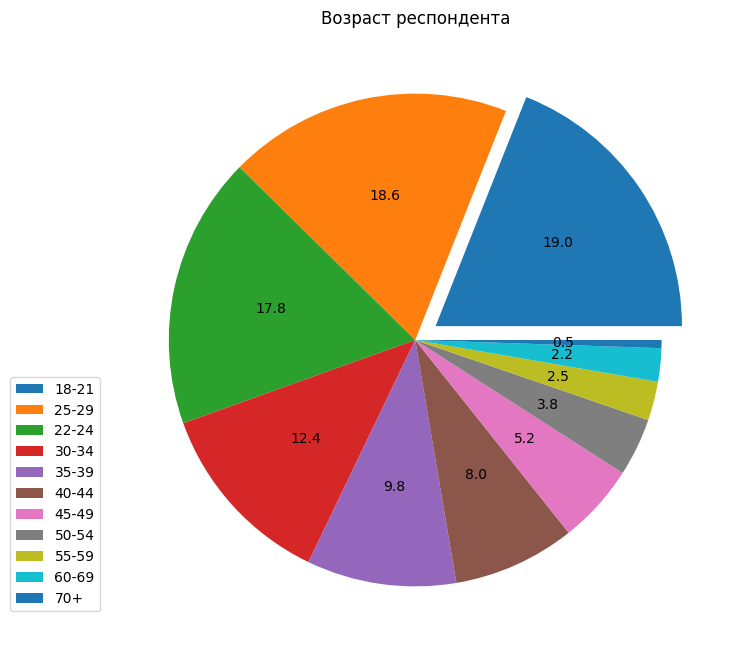

In [4]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(data['Q2'].value_counts().values, autopct='%1.1f', explode=explode)
plt.title("Возраст респондента")
ax.legend(data['Q2'].value_counts().index,
          loc="center right",
          bbox_to_anchor=(0, 0, 0, 0.5))
plt.show()

**Задание 2**

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

In [5]:
Q15_columns = [col for col in data.columns if col.startswith('Q15')]
bibl = data[Q15_columns].melt(var_name='курс', value_vars=Q15_columns)
bibl = bibl[bibl['value'] != 'None']
bibl['value'].value_counts()

 Matplotlib                  14010
 Seaborn                     10512
 Plotly / Plotly Express      5078
 Ggplot / ggplot2             4145
 Geoplotlib                   1167
 Shiny                        1043
 Bokeh                         771
 D3 js                         734
Other                          691
 Leaflet / Folium              554
 Pygal                         318
 Altair                        300
 Dygraphs                      225
 Highcharter                   198
Name: value, dtype: int64

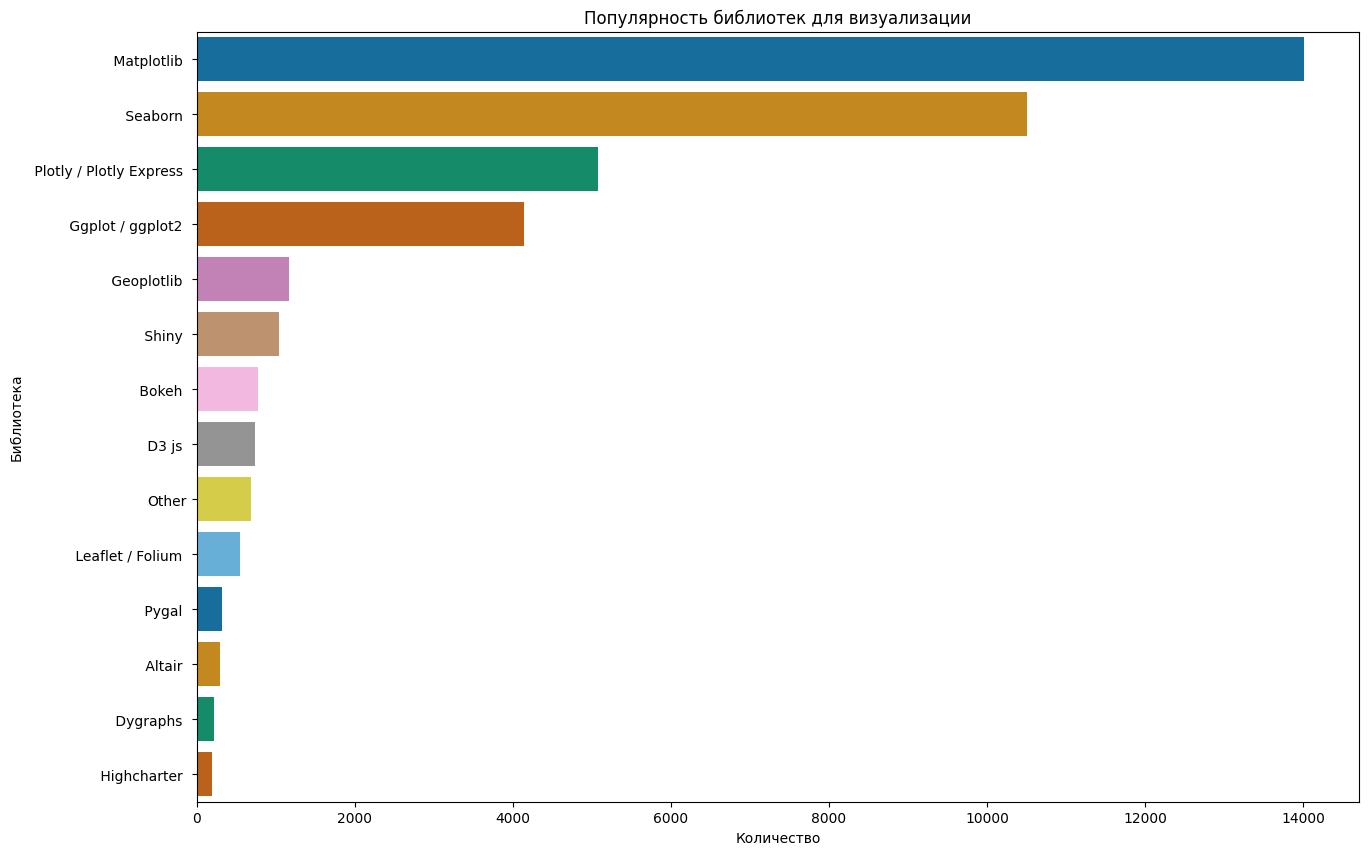

In [6]:
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y=bibl['value'].value_counts().index, x=bibl['value'].value_counts().values, palette="colorblind").set_ylabel("Библиотека")
ax.set(xlabel="Количество", title='Популярность библиотек для визуализации');

**Задание 3**


Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

In [7]:
salary_mapping = {
    '$0-999': 500, '1,000-1,999': 1500, '2,000-2,999': 2500, '3,000-3,999': 3500, '4,000-4,999': 4500, '5,000-7,499': 6250, 
    '7,500-9,999': 8750, '10,000-14,999': 12500, '15,000-19,999': 17500, '20,000-24,999': 22500, '25,000-29,999': 27500, 
    '30,000-39,999': 35000, '40,000-49,999': 45000, '50,000-59,999': 55000, '60,000-69,999': 65000, '70,000-79,999': 75000, 
    '80,000-89,999': 85000, '90,000-99,999': 95000, '100,000-124,999': 112500, '125,000-149,999': 137500, '150,000-199,999': 175000, 
    '200,000-249,999': 225000, '250,000-299,999': 275000, '300,000-499,999': 400000, '$500,000-999,999': 750000, '>$1,000,000': 1000000, 
}
data['Q29_new'] = data['Q29'].map(salary_mapping)
pd.pivot_table(data, values='Q29_new', index='Q23', aggfunc=('median', 'max')).sort_values(by='median', ascending=False)

,max,median
Q23,,
Data Architect,750000.0,65000.0
"Manager (Program, Project, Operations, Executive-level, etc)",1000000.0,60000.0
Data Scientist,1000000.0,45000.0
Research Scientist,1000000.0,35000.0
Developer Advocate,400000.0,31250.0
Machine Learning/ MLops Engineer,1000000.0,27500.0
Data Engineer,750000.0,22500.0
Other,750000.0,20000.0
Software Engineer,1000000.0,17500.0


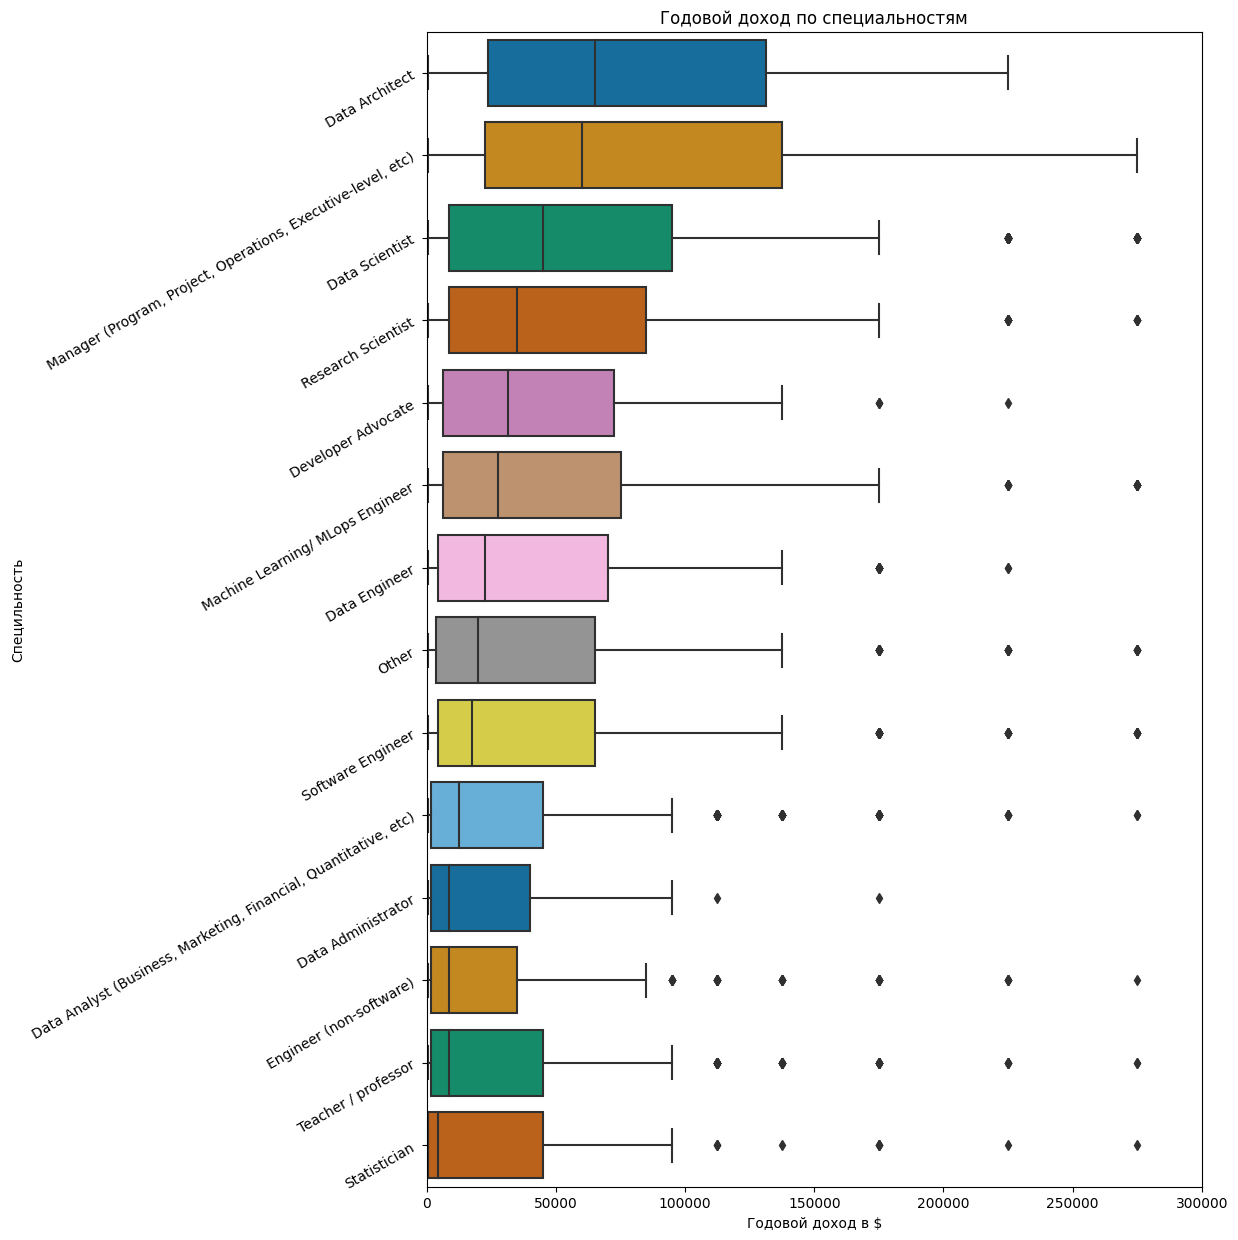

In [8]:
f, ax = plt.subplots(figsize=(10, 15))
data_salary = data[['Q23', 'Q29_new']]
sns.boxplot(x="Q29_new", y="Q23",
            palette='colorblind',
            data=data_salary,
            order=pd.pivot_table(data_salary, values='Q29_new', index='Q23', aggfunc=('median', 'max')).sort_values(by='median', ascending=False).index)
ax.set(xlim=(0, 300000), xlabel="Годовой доход в $", title='Годовой доход по специальностям',  ylabel='Специльность')
ax.set_yticklabels(ax.get_yticklabels(),rotation = 30);

**Задание 4**


Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, Research Scientist, Software Engineer, Data Architect.
Цвета в этом задании не важны

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data_spec_age = pd.crosstab(data["Q2"], data["Q23"], margins=True)
data_spec_age = data_spec_age.iloc[0:11] 

fig = make_subplots(rows=3, cols=3, subplot_titles=("Data Administrator", "Data Analyst", "Data Engineer", "Data Scientist", "Engineer", "MLops Engineer", "Research Scientist", "Software Engineer", "Data Architect"))
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Data Administrator"],name='Data Administrator')), 1, 1)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Data Analyst (Business, Marketing, Financial, Quantitative, etc)"], name ='Data Analyst')), 1, 2)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Data Engineer"], name ='Data Engineer')), 1, 3)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Data Scientist"], name ='Data Scientist')), 2, 1)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Engineer (non-software)"], name ='Engineer')), 2, 2)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Machine Learning/ MLops Engineer"], name ='MLops Engineer')), 2, 3)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Research Scientist"], name ='Research Scientist')), 3, 1)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Software Engineer"], name ='Software Engineer')), 3, 2)
fig.add_trace((go.Bar(x=data_spec_age.index, y=data_spec_age["Data Architect"], name ='Data Architect')), 3, 3)

fig.update_xaxes(tickangle=90)
fig.update_layout(title_text='Распределение возрастов по специальностям', width=1200, height=800)

**Задание 5**


Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет plotly.choropleth.
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [10]:
data_country = data['Q4'].value_counts().reset_index()
data_country.rename(columns = {'index':'country'}, inplace = True ) # Количество респондентов в разрезе стран
df = px.data.gapminder() # информация с аббревиатурами стран
data_country_abr = pd.merge(data_country, df[['country','iso_alpha']].drop_duplicates(), on="country", how="left") # Объединю с таблицей с аббревиатурами по ключу country
# Проставлю сокращения там, где они не выставились автоматом из-за написания
data_country_abr.iloc[1, 2] = 'USA'
data_country_abr.iloc[12, 2] = 'RUS'
data_country_abr.iloc[13, 2] = 'KOR'
data_country_abr.iloc[15, 2] = 'GBR'
data_country_abr.iloc[21, 2] = 'VNM'
data_country_abr.iloc[30, 2] = 'IRN'
data_country_abr.iloc[40, 2] = 'ARE'
data_country_abr.iloc[43, 2] = 'UKR'
data_country_abr.iloc[50, 2] = 'HKG'
# Построю график
fig = px.choropleth(data_country_abr, locations="iso_alpha",  #ссылка на аббревиатуру страны
                    color="Q4", # Передам количество респодентов цветовую шкалу
                    hover_name="country", # при наведении курсора будет выпадать название страны
                    range_color=(0, 1000),  # Изменю цветовую шкалу
                    color_continuous_scale="Viridis",
                    labels={'Q4':'Количество респондентов'}, # переименую подпись шкалы
                    )
fig.update_layout(
     title_x=0.4, title_text='Карта Мира', width=1200, height=800)
     
fig.show()

**Задание 6 - Дополнительное**


Одна из самых красивых и динамичных визуализаций - это Bar Chart Race. Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками.
Загрузи итоговую визуализацию на гит в формате .gif.

In [11]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 6.2 MB/s eta 0:00:00


In [19]:
employed_compensation = pd.crosstab(data["Q23"], data["Q2"], margins=True)
employed_compensation = employed_compensation.iloc[0:11] 

In [21]:
import bar_chart_race as bcr
bcr.bar_chart_race(df=employed_compensation, title='Количество респондентов по возрасту и специальности', filename=None) 

/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

